# Proyek Analisis Data: Bike Sharing Dataset

**Menentukan Pertanyaan Bisnis**
1. Pada musim apakah sepeda paling sering disewa?
2. Bagaimana perkembangan sewa sepeda dari tahun 2011-2012?
3. Pada cuaca apa sepeda paling sering disewa dan pada cuaca apa sepeda paling jarang disewa?

Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Data Gathering

Memanggil data day.csv dan hour.csv

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.shape

(731, 16)

# Assessing Data

Menilai table day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa jumlah setiap table sama, maka disimpulkan bahwa tidak ada data yang null

In [5]:
day_df.duplicated().sum()

0

Terlihat bahwa jumlah data yang duplikat adalah 0, maka disimpulkan bahwa tidak ada data yang duplikat

# Cleaning Data

In [6]:
day_df.loc[day_df['season'] == 1, 'season'] = 'spring'
day_df.loc[day_df['season'] == 2, 'season'] = 'summer'
day_df.loc[day_df['season'] == 3, 'season'] = 'fall'
day_df.loc[day_df['season'] == 4, 'season'] = 'winter'

In [7]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
day_df.loc[day_df['yr'] == 0, 'yr'] = '2011'
day_df.loc[day_df['yr'] == 1, 'yr'] = '2012'

In [9]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
day_df.loc[day_df['mnth'] == 1, 'mnth'] = 'January'
day_df.loc[day_df['mnth'] == 2, 'mnth'] = 'February'
day_df.loc[day_df['mnth'] == 3, 'mnth'] = 'March'
day_df.loc[day_df['mnth'] == 4, 'mnth'] = 'April'
day_df.loc[day_df['mnth'] == 5, 'mnth'] = 'May'
day_df.loc[day_df['mnth'] == 6, 'mnth'] = 'June'
day_df.loc[day_df['mnth'] == 7, 'mnth'] = 'July'
day_df.loc[day_df['mnth'] == 8, 'mnth'] = 'August'
day_df.loc[day_df['mnth'] == 9, 'mnth'] = 'September'
day_df.loc[day_df['mnth'] == 10, 'mnth'] = 'October'
day_df.loc[day_df['mnth'] == 11, 'mnth'] = 'November'
day_df.loc[day_df['mnth'] == 12, 'mnth'] = 'December'

In [11]:
day_df.loc[day_df['weekday'] == 0, 'weekday'] = 'Sunday'
day_df.loc[day_df['weekday'] == 1, 'weekday'] = 'Monday'
day_df.loc[day_df['weekday'] == 2, 'weekday'] = 'Tuesday'
day_df.loc[day_df['weekday'] == 3, 'weekday'] = 'Wednesday'
day_df.loc[day_df['weekday'] == 4, 'weekday'] = 'Thursday'
day_df.loc[day_df['weekday'] == 5, 'weekday'] = 'Friday'
day_df.loc[day_df['weekday'] == 6, 'weekday'] = 'Saturday'

In [12]:
day_df.loc[day_df['workingday'] == 0, 'workingday'] = 'no'
day_df.loc[day_df['workingday'] == 1, 'workingday'] = 'yes'

In [13]:
day_df.loc[day_df['weathersit'] == 1, 'weathersit'] = 'clear & cloudy'
day_df.loc[day_df['weathersit'] == 2, 'weathersit'] = 'mist & cloudy'
day_df.loc[day_df['weathersit'] == 3, 'weathersit'] = 'light snow / rain'
day_df.loc[day_df['weathersit'] == 4, 'weathersit'] = 'heavy rain / snow'

In [14]:
day_df = day_df.drop("instant", axis=1)

In [15]:
day_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,January,0,Saturday,no,mist & cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,January,0,Sunday,no,mist & cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,January,0,Monday,yes,clear & cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,January,0,Tuesday,yes,clear & cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,January,0,Wednesday,yes,clear & cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,spring,2011,January,0,Thursday,yes,clear & cloudy,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,spring,2011,January,0,Friday,yes,mist & cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,spring,2011,January,0,Saturday,no,mist & cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,spring,2011,January,0,Sunday,no,clear & cloudy,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,spring,2011,January,0,Monday,yes,clear & cloudy,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [16]:
day_df = day_df.rename(columns= {
    'yr' : 'year',
    'mnth':'month',
    'weekday':'day',
    'cnt':'count'
})

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   year        731 non-null    object 
 3   month       731 non-null    object 
 4   holiday     731 non-null    int64  
 5   day         731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  count       731 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 85.8+ KB


In [18]:
day_df.head()

,dteday,season,year,month,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,spring,2011,January,0,Saturday,no,mist & cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,January,0,Sunday,no,mist & cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,January,0,Monday,yes,clear & cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,January,0,Tuesday,yes,clear & cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,January,0,Wednesday,yes,clear & cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
day_df.describe()

,holiday,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# EDA

In [20]:
day_df.groupby(by='season').agg({
    'count':'sum'
}).sort_values(by='count', ascending=False)

,count
season,
fall,1061129
summer,918589
winter,841613
spring,471348


Sepeda paling sering disewa pada musim gugur dan paling jarang disewa pada musim semi

In [21]:
day_df.groupby(by='weathersit').agg({
    'count':'sum'
}).sort_values(by='count', ascending=False)

,count
weathersit,
clear & cloudy,2257952
mist & cloudy,996858
light snow / rain,37869


Sepeda paling sering disewa saat cuaca cerah dan berawan. Sedangkan sepeda tidak pernah disewa pada saat cuaca hujan lebat.

In [22]:
day_df.groupby(by='day').agg({
    'count':'sum'
}).sort_values(by='count', ascending=False)

,count
day,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


Sepeda paling sering disewa pada hari jumat.

In [23]:
day_df.groupby(by=['year']).agg({
    'count':'sum'
}).sort_values(by=['year','count'], ascending=False)

,count
year,
2012,2049576
2011,1243103


Sepeda paling sering disewa pada tahun 2012. Berikut merupakan rincian per bulannya:

In [24]:
day_df.groupby(by=['year','month']).agg({
    'count':'sum'
}).sort_values(by=['year','count'], ascending=False)

count
year month            
2012 September  218573
     August     214503
     July       203607
     June       202830
     October    198841
     May        195865
     April      174224
     March      164875
     November   152664
     December   123713
     February   103137
     January     96744
2011 June       143512
     July       141341
     August     136691
     May        135821
     September  127418
     October    123511
     November   102167
     April       94870
     December    87323
     March       64045
     February    48215
     January     38189

Berikut merupakan jumlah dari penyewa yang merupakan pengguna biasa

In [25]:
day_df.groupby(by=['year','month']).agg({
    'casual':'sum'
}).sort_values(by=['year','casual'], ascending=False)

casual
year month            
2012 May         44235
     September   43778
     June        43294
     August      43197
     July        41705
     April       38456
     October     34538
     March       31618
     November    21009
     December    13245
     January      8969
     February     8721
2011 July        36452
     May         31050
     June        30612
     August      28842
     September   26545
     October     25222
     April       22346
     November    15594
     March       12826
     December     8448
     February     6242
     January      3073

Berikut merupakan jumlah dari penyewa yang merupakan pengguna yang teregistrasi

In [26]:
day_df.groupby(by=['year','month']).agg({
    'registered':'sum'
}).sort_values(by=['year','registered'], ascending=False)

registered
year month                
2012 September      174795
     August         171306
     October        164303
     July           161902
     June           159536
     May            151630
     April          135768
     March          133257
     November       131655
     December       110468
     February        94416
     January         87775
2011 June           112900
     August         107849
     July           104889
     May            104771
     September      100873
     October         98289
     November        86573
     December        78875
     April           72524
     March           51219
     February        41973
     January         35116

# Visualization

<Axes: xlabel='season'>

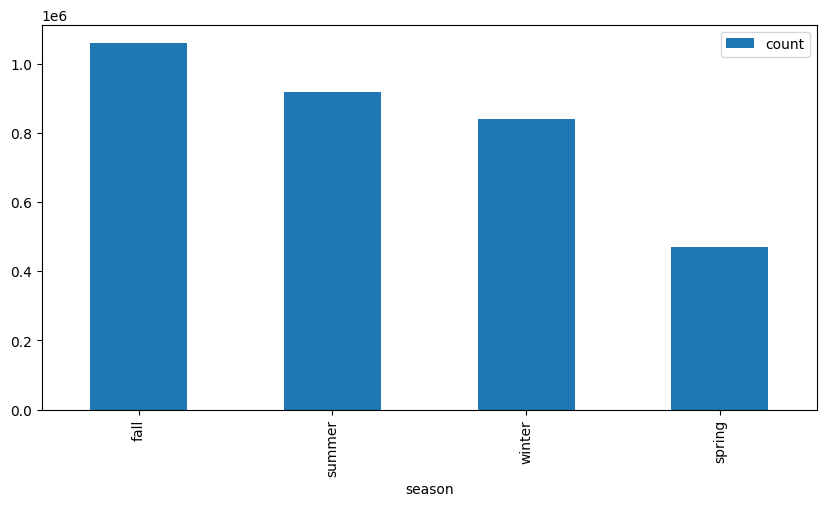

In [27]:
season_df = day_df.groupby(by='season').agg({
    'count':'sum'
}).sort_values(by='count', ascending=False)
season_df.plot(kind='bar', figsize=(10,5))

<Axes: xlabel='year'>

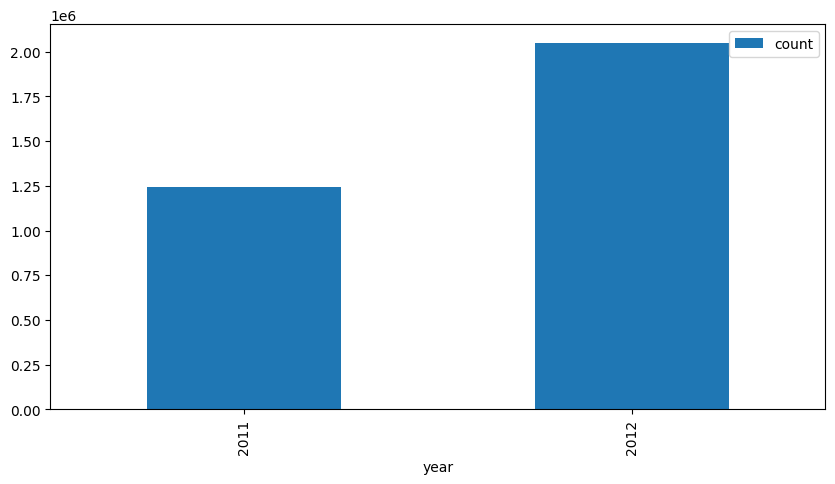

In [31]:
year_df = day_df.groupby(by=['year']).agg({
    'count':'sum'
})
year_df.plot(kind='bar', figsize=(10,5))


<Axes: xlabel='weathersit'>

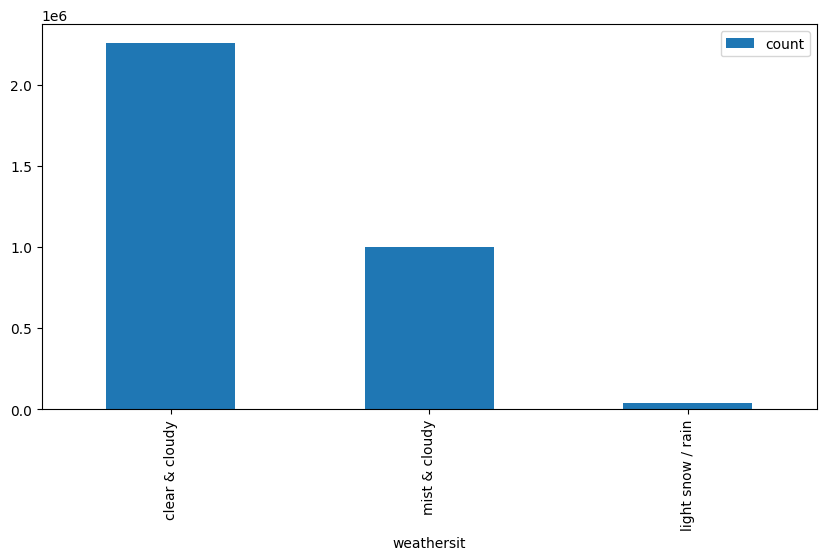

In [32]:
weather = day_df.groupby(by='weathersit').agg({
    'count':'sum'
}).sort_values(by='count', ascending=False)
weather.plot(kind='bar', figsize=(10,5))